In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

data_file = 'naive_bayes_data/wdbc.data'
raw_data = np.genfromtxt(data_file, delimiter=',', dtype=None, encoding=None)
np.random.shuffle(raw_data)
classes = np.array([-1 if row[1] == 'M' else 1 if row[1] == 'B' else None for row in raw_data])
feature_matrix = np.array([list(row)[2:] for row in raw_data])
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, classes, test_size=0.16, random_state=42)

#print(len(X_train))
#print(len(X_test))

class NaiveBayes:

    def __init__(self):
        self._classes = None
        self._mean = None
        self._var = None
        self._priors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)


    def _predict_sample(self, x):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x) + 1e-9))
            posterior = posterior + prior
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        return (np.exp(-((x - mean) ** 2) / (2 * var))) / (np.sqrt(2 * np.pi * var))

    

Accuracy is 0.9565217391304348
[-1  1]
[ 1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1
  1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1]
[ 1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1
  1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1]
56
[[34  2]
 [ 2 54]]


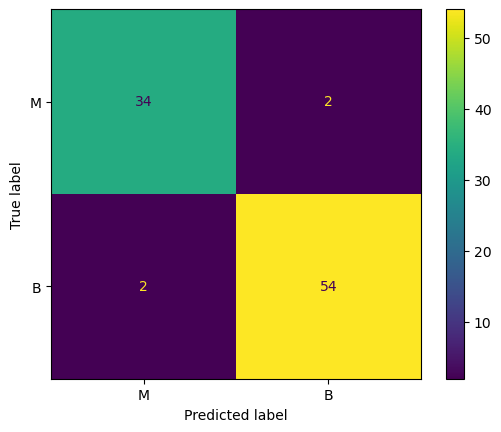

In [75]:
def main():
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)
    print("Accuracy is", accuracy(y_test, predictions))
    print(nb._classes)
    print(y_test)
    print(predictions)
    print(np.count_nonzero(y_test == 1))

    cm = confusion_matrix(y_test, predictions, labels=nb._classes)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['M', 'B'])
    cm_disp.plot()
    print(cm)
if __name__ == "__main__":
    main()